In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

print(fake_df.head())
print(true_df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [4]:
fake_df["label"] = 0
true_df["label"] = 1

In [5]:
fake_df["content"] = fake_df["title"] + " " + fake_df["text"]
true_df["content"] = true_df["title"] + " " + true_df["text"]

In [6]:
df = pd.concat([fake_df, true_df], axis=0)

# Barajar los datos
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df = df[["content", "label"]]

df.head()

,content,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,0
1,Trump drops Steve Bannon from National Securit...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,0
4,Donald Trump heads for Scotland to reopen a go...,1


In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = text.strip()
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df["content"] = df["content"].apply(clean_text)

In [8]:
X = df["content"]
y = df["label"]

In [9]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

X_tfidf = vectorizer.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42
)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.988641425389755

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



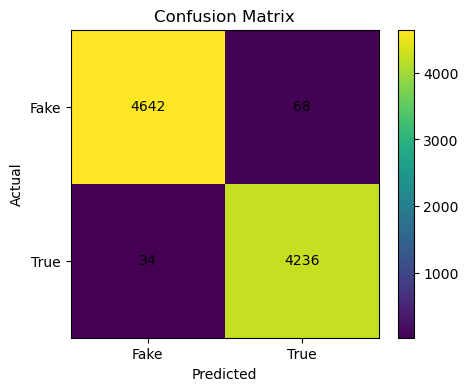

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Fake", "True"])
plt.yticks([0,1], ["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

In [14]:
def predict_news(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    prediction = model.predict(vector)[0]

    if prediction == 1:
        return "🟢 NOTICIA VERDADERA"
    else:
        return "🔴 NOTICIA FALSA"

In [30]:
news_example = """
WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May
"""

In [31]:
resultado = predict_news(news_example)
print(resultado)

🟢 NOTICIA VERDADERA
